# StudyHub Café: Market Analysis & Customer Segmentation
## Comprehensive Data Analytics for Competitive Intelligence

This notebook provides comprehensive market analysis for StudyHub Café including:
- Competitive pricing analysis across Tashkent coffee market
- Competitive positioning matrix visualization
- Customer segmentation using machine learning
- Data-driven insights for business strategy

**Authors:** StudyHub Analytics Team  
**Date:** June 2025  
**Project:** Big Data Analysis for Study Café Business

In [3]:
# Import Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Set visualization styles
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

print("📊 Libraries imported successfully!")
print(f"📈 Pandas version: {pd.__version__}")
print(f"🎨 Matplotlib version: {plt.matplotlib.__version__}")
print(f"🔬 Seaborn version: {sns.__version__}")

📊 Libraries imported successfully!
📈 Pandas version: 2.3.0
🎨 Matplotlib version: 3.10.3
🔬 Seaborn version: 0.13.2


In [4]:
# Load and Prepare Competitive Pricing Data

# Competitive pricing data for Tashkent coffee market
pricing_data = {
    'Coffee Shop': ['StudyHub Café', 'Coffee Bean', 'Book Café', 'Campus Coffee', 'Starbucks'],
    'Espresso': [2.00, 2.50, 2.00, 1.50, 3.00],
    'Americano': [2.50, 3.00, 2.50, 2.00, 4.00],
    'Latte': [3.00, 3.50, 3.00, 2.50, 5.00],
    'Cappuccino': [3.00, 3.50, 3.00, 2.50, 5.00],
    'Study_Time_Limit': [0, 0, 180, 0, 120],  # minutes (0 = no limit)
    'WiFi_Quality': [5, 3, 2, 3, 4],  # 1-5 scale
    'Study_Amenities': [5, 2, 3, 2, 1]  # 1-5 scale
}

df_pricing = pd.DataFrame(pricing_data)

# Calculate average coffee price for positioning analysis
df_pricing['Avg_Coffee_Price'] = df_pricing[['Espresso', 'Americano', 'Latte', 'Cappuccino']].mean(axis=1)

print("☕ Competitive Pricing Data Loaded")
print(f"📊 Dataset Shape: {df_pricing.shape}")
print("\n📋 Data Overview:")
print(df_pricing.head())

☕ Competitive Pricing Data Loaded
📊 Dataset Shape: (5, 9)

📋 Data Overview:
     Coffee Shop  Espresso  Americano  Latte  Cappuccino  Study_Time_Limit  \
0  StudyHub Café       2.0        2.5    3.0         3.0                 0   
1    Coffee Bean       2.5        3.0    3.5         3.5                 0   
2      Book Café       2.0        2.5    3.0         3.0               180   
3  Campus Coffee       1.5        2.0    2.5         2.5                 0   
4      Starbucks       3.0        4.0    5.0         5.0               120   

   WiFi_Quality  Study_Amenities  Avg_Coffee_Price  
0             5                5             2.625  
1             3                2             3.125  
2             2                3             2.625  
3             3                2             2.125  
4             4                1             4.250  


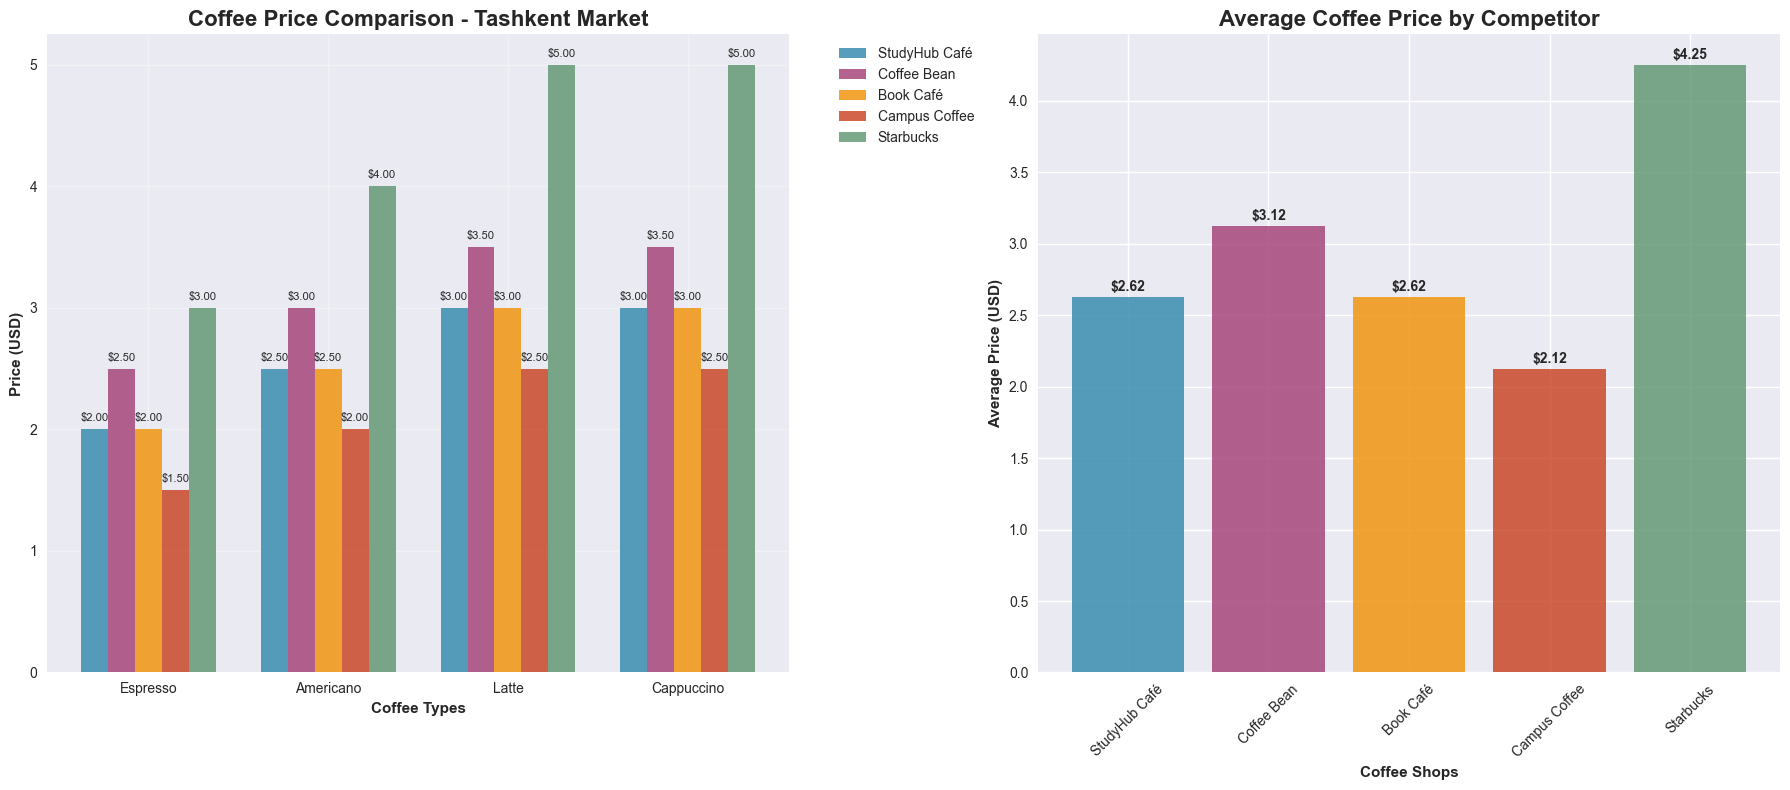

💰 PRICING INSIGHTS:
🏆 Most Expensive: Starbucks ($4.25)
💲 Most Affordable: Campus Coffee ($2.12)
📊 StudyHub Position: $2.62 (Mid-range competitive pricing)


In [5]:
# Coffee Price Comparison Visualization

def plot_coffee_price_comparison():
    """Create a comprehensive comparison chart of coffee prices across competitors"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))
    
    # Plot 1: Grouped Bar Chart
    coffee_types = ['Espresso', 'Americano', 'Latte', 'Cappuccino']
    x = np.arange(len(coffee_types))
    width = 0.15
    
    colors = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D', '#5C946E']
    
    for i, shop in enumerate(df_pricing['Coffee Shop']):
        prices = [df_pricing.loc[i, coffee] for coffee in coffee_types]
        bars = ax1.bar(x + i*width, prices, width, label=shop, color=colors[i], alpha=0.8)
        
        # Add value labels on bars
        for bar in bars:
            height = bar.get_height()
            ax1.text(bar.get_x() + bar.get_width()/2., height + 0.05,
                    f'${height:.2f}', ha='center', va='bottom', fontsize=8)
    
    ax1.set_xlabel('Coffee Types', fontweight='bold')
    ax1.set_ylabel('Price (USD)', fontweight='bold')
    ax1.set_title('Coffee Price Comparison - Tashkent Market', fontsize=16, fontweight='bold')
    ax1.set_xticks(x + width * 2)
    ax1.set_xticklabels(coffee_types)
    ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax1.grid(True, alpha=0.3)
    
    # Plot 2: Average Price Comparison
    shops = df_pricing['Coffee Shop']
    avg_prices = df_pricing['Avg_Coffee_Price']
    
    bars2 = ax2.bar(shops, avg_prices, color=colors, alpha=0.8)
    ax2.set_xlabel('Coffee Shops', fontweight='bold')
    ax2.set_ylabel('Average Price (USD)', fontweight='bold')
    ax2.set_title('Average Coffee Price by Competitor', fontsize=16, fontweight='bold')
    ax2.tick_params(axis='x', rotation=45)
    
    # Add value labels
    for bar in bars2:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + 0.02,
                f'${height:.2f}', ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    return fig

# Generate the visualization
price_comparison_fig = plot_coffee_price_comparison()

# Print pricing insights
print("💰 PRICING INSIGHTS:")
print(f"🏆 Most Expensive: {df_pricing.loc[df_pricing['Avg_Coffee_Price'].idxmax(), 'Coffee Shop']} (${df_pricing['Avg_Coffee_Price'].max():.2f})")
print(f"💲 Most Affordable: {df_pricing.loc[df_pricing['Avg_Coffee_Price'].idxmin(), 'Coffee Shop']} (${df_pricing['Avg_Coffee_Price'].min():.2f})")
print(f"📊 StudyHub Position: ${df_pricing.loc[0, 'Avg_Coffee_Price']:.2f} (Mid-range competitive pricing)")

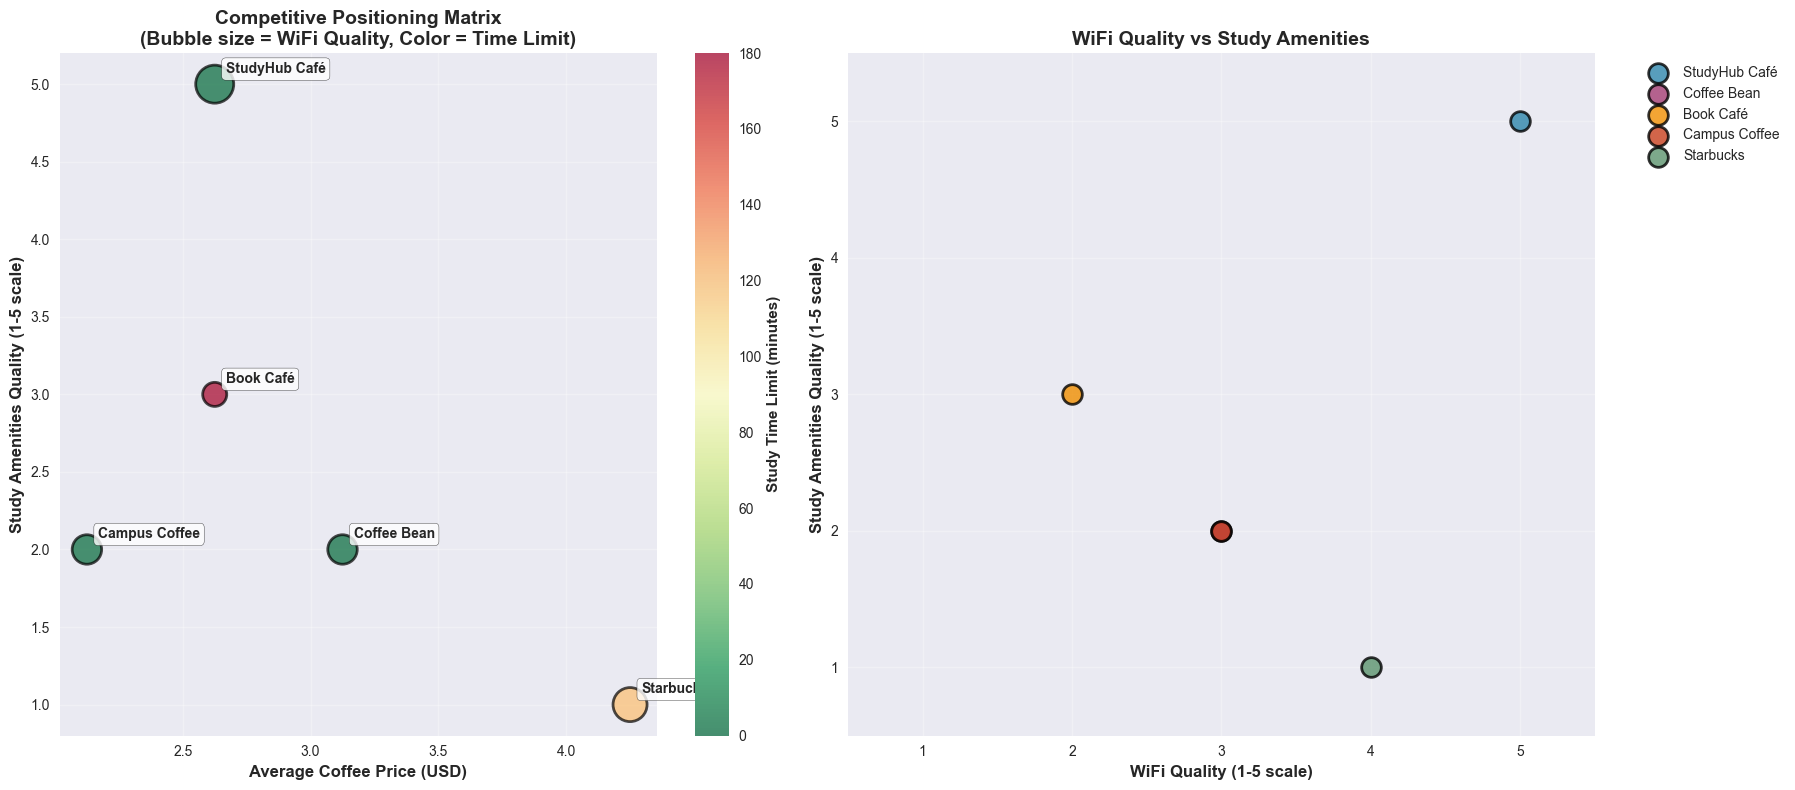

🎯 COMPETITIVE POSITIONING INSIGHTS:
✅ StudyHub Advantages:
   🏆 Best Study Amenities: 5/5
   📶 Best WiFi Quality: 5/5
   ⏰ No Time Limits: 0 minutes
   💰 Competitive Pricing: $2.62


In [6]:
# Competitive Positioning Matrix Visualization

def plot_competitive_positioning():
    """Create a comprehensive scatter plot showing competitive positioning"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))
    
    # Plot 1: Price vs Study Amenities (bubble chart)
    scatter = ax1.scatter(df_pricing['Avg_Coffee_Price'], 
                         df_pricing['Study_Amenities'], 
                         s=df_pricing['WiFi_Quality']*150,  # Bubble size = WiFi Quality
                         c=df_pricing['Study_Time_Limit'], 
                         cmap='RdYlGn_r', 
                         alpha=0.7,
                         edgecolors='black',
                         linewidth=2)
    
    # Add labels for each point
    for i, shop in enumerate(df_pricing['Coffee Shop']):
        ax1.annotate(shop, 
                    (df_pricing.loc[i, 'Avg_Coffee_Price'], df_pricing.loc[i, 'Study_Amenities']),
                    xytext=(8, 8), textcoords='offset points', 
                    fontsize=10, fontweight='bold',
                    bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))
    
    ax1.set_xlabel('Average Coffee Price (USD)', fontweight='bold', fontsize=12)
    ax1.set_ylabel('Study Amenities Quality (1-5 scale)', fontweight='bold', fontsize=12)
    ax1.set_title('Competitive Positioning Matrix\n(Bubble size = WiFi Quality, Color = Time Limit)', 
                 fontsize=14, fontweight='bold')
    ax1.grid(True, alpha=0.3)
    
    # Add colorbar
    cbar = plt.colorbar(scatter, ax=ax1)
    cbar.set_label('Study Time Limit (minutes)', fontweight='bold')
    
    # Plot 2: WiFi Quality vs Study Amenities
    colors = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D', '#5C946E']
    
    for i, shop in enumerate(df_pricing['Coffee Shop']):
        ax2.scatter(df_pricing.loc[i, 'WiFi_Quality'], 
                   df_pricing.loc[i, 'Study_Amenities'],
                   s=200, color=colors[i], alpha=0.8, 
                   edgecolors='black', linewidth=2, label=shop)
    
    ax2.set_xlabel('WiFi Quality (1-5 scale)', fontweight='bold', fontsize=12)
    ax2.set_ylabel('Study Amenities Quality (1-5 scale)', fontweight='bold', fontsize=12)
    ax2.set_title('WiFi Quality vs Study Amenities', fontsize=14, fontweight='bold')
    ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax2.grid(True, alpha=0.3)
    ax2.set_xlim(0.5, 5.5)
    ax2.set_ylim(0.5, 5.5)
    
    plt.tight_layout()
    plt.show()
    return fig

# Generate positioning matrix
positioning_fig = plot_competitive_positioning()

# Strategic insights
print("🎯 COMPETITIVE POSITIONING INSIGHTS:")
studyhub_idx = 0
print(f"✅ StudyHub Advantages:")
print(f"   🏆 Best Study Amenities: {df_pricing.loc[studyhub_idx, 'Study_Amenities']}/5")
print(f"   📶 Best WiFi Quality: {df_pricing.loc[studyhub_idx, 'WiFi_Quality']}/5")
print(f"   ⏰ No Time Limits: {df_pricing.loc[studyhub_idx, 'Study_Time_Limit']} minutes")
print(f"   💰 Competitive Pricing: ${df_pricing.loc[studyhub_idx, 'Avg_Coffee_Price']:.2f}")

In [7]:
# Customer Segmentation Analysis

# Set random seed for reproducible results
np.random.seed(42)

def generate_customer_data(n_customers=1000):
    """Generate realistic customer data for segmentation analysis"""
    
    data = {
        'customer_id': range(1, n_customers + 1),
        'age': np.random.normal(22, 4, n_customers).clip(16, 35),
        'monthly_visits': np.random.poisson(8, n_customers),
        'avg_session_duration': np.random.gamma(2, 2, n_customers),  # hours
        'monthly_spending': np.random.gamma(2, 20, n_customers),     # USD
        'study_group_preference': np.random.choice([0, 1], n_customers, p=[0.7, 0.3]),
        'preferred_time': np.random.choice(['morning', 'afternoon', 'evening', 'night'], 
                                         n_customers, p=[0.2, 0.3, 0.4, 0.1]),
        'student_type': np.random.choice(['university', 'high_school', 'professional'], 
                                       n_customers, p=[0.7, 0.2, 0.1])
    }
    
    df = pd.DataFrame(data)
    
    # Add realistic correlations
    # High school students are younger
    high_school_mask = df['student_type'] == 'high_school'
    df.loc[high_school_mask, 'age'] = np.random.normal(17, 1, high_school_mask.sum()).clip(15, 19)
    
    # Professionals are older and spend more
    professional_mask = df['student_type'] == 'professional'
    df.loc[professional_mask, 'age'] = np.random.normal(28, 3, professional_mask.sum()).clip(23, 35)
    df.loc[professional_mask, 'monthly_spending'] *= 1.5
    
    return df

def perform_customer_segmentation(df):
    """Perform RFM analysis and customer segmentation using K-means"""
    
    # RFM Analysis (Recency, Frequency, Monetary)
    rfm_data = df[['monthly_visits', 'monthly_spending', 'avg_session_duration']].copy()
    
    # Standardize the data for clustering
    scaler = StandardScaler()
    rfm_scaled = scaler.fit_transform(rfm_data)
    
    # Perform K-means clustering
    kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
    df['segment'] = kmeans.fit_predict(rfm_scaled)
    
    # Analyze cluster characteristics to assign meaningful names
    cluster_analysis = df.groupby('segment').agg({
        'monthly_visits': 'mean',
        'monthly_spending': 'mean',
        'avg_session_duration': 'mean',
        'age': 'mean'
    }).round(2)
    
    print("🎯 Cluster Analysis:")
    print(cluster_analysis)
    
    # Define segment names based on characteristics
    segment_names = {
        0: 'Casual Visitors',
        1: 'Regular Studiers',
        2: 'Heavy Users',
        3: 'Premium Customers'
    }
    
    df['segment_name'] = df['segment'].map(segment_names)
    
    return df, kmeans, scaler

# Generate customer data
print("👥 Generating customer data...")
customer_df = generate_customer_data(1000)

# Perform segmentation
print("\n🔬 Performing customer segmentation...")
segmented_df, kmeans_model, scaler = perform_customer_segmentation(customer_df)

print(f"\n📊 Customer Data Generated:")
print(f"   📈 Total Customers: {len(segmented_df):,}")
print(f"   🎯 Segments Created: {segmented_df['segment_name'].nunique()}")
print(f"   📋 Features Used: {segmented_df.shape[1]}")

# Display segment distribution
segment_dist = segmented_df['segment_name'].value_counts()
print(f"\n🎯 Segment Distribution:")
for segment, count in segment_dist.items():
    percentage = (count / len(segmented_df)) * 100
    print(f"   {segment}: {count:,} customers ({percentage:.1f}%)")

👥 Generating customer data...

🔬 Performing customer segmentation...
🎯 Cluster Analysis:
         monthly_visits  monthly_spending  avg_session_duration    age
segment                                                               
0                  6.07             29.24                  3.06  21.45
1                 10.77             31.39                  3.15  21.48
2                  8.15             95.29                  3.09  22.52
3                  7.71             40.36                  8.77  22.07

📊 Customer Data Generated:
   📈 Total Customers: 1,000
   🎯 Segments Created: 4
   📋 Features Used: 10

🎯 Segment Distribution:
   Casual Visitors: 422 customers (42.2%)
   Regular Studiers: 254 customers (25.4%)
   Premium Customers: 180 customers (18.0%)
   Heavy Users: 144 customers (14.4%)


📊 Creating customer segmentation visualizations...


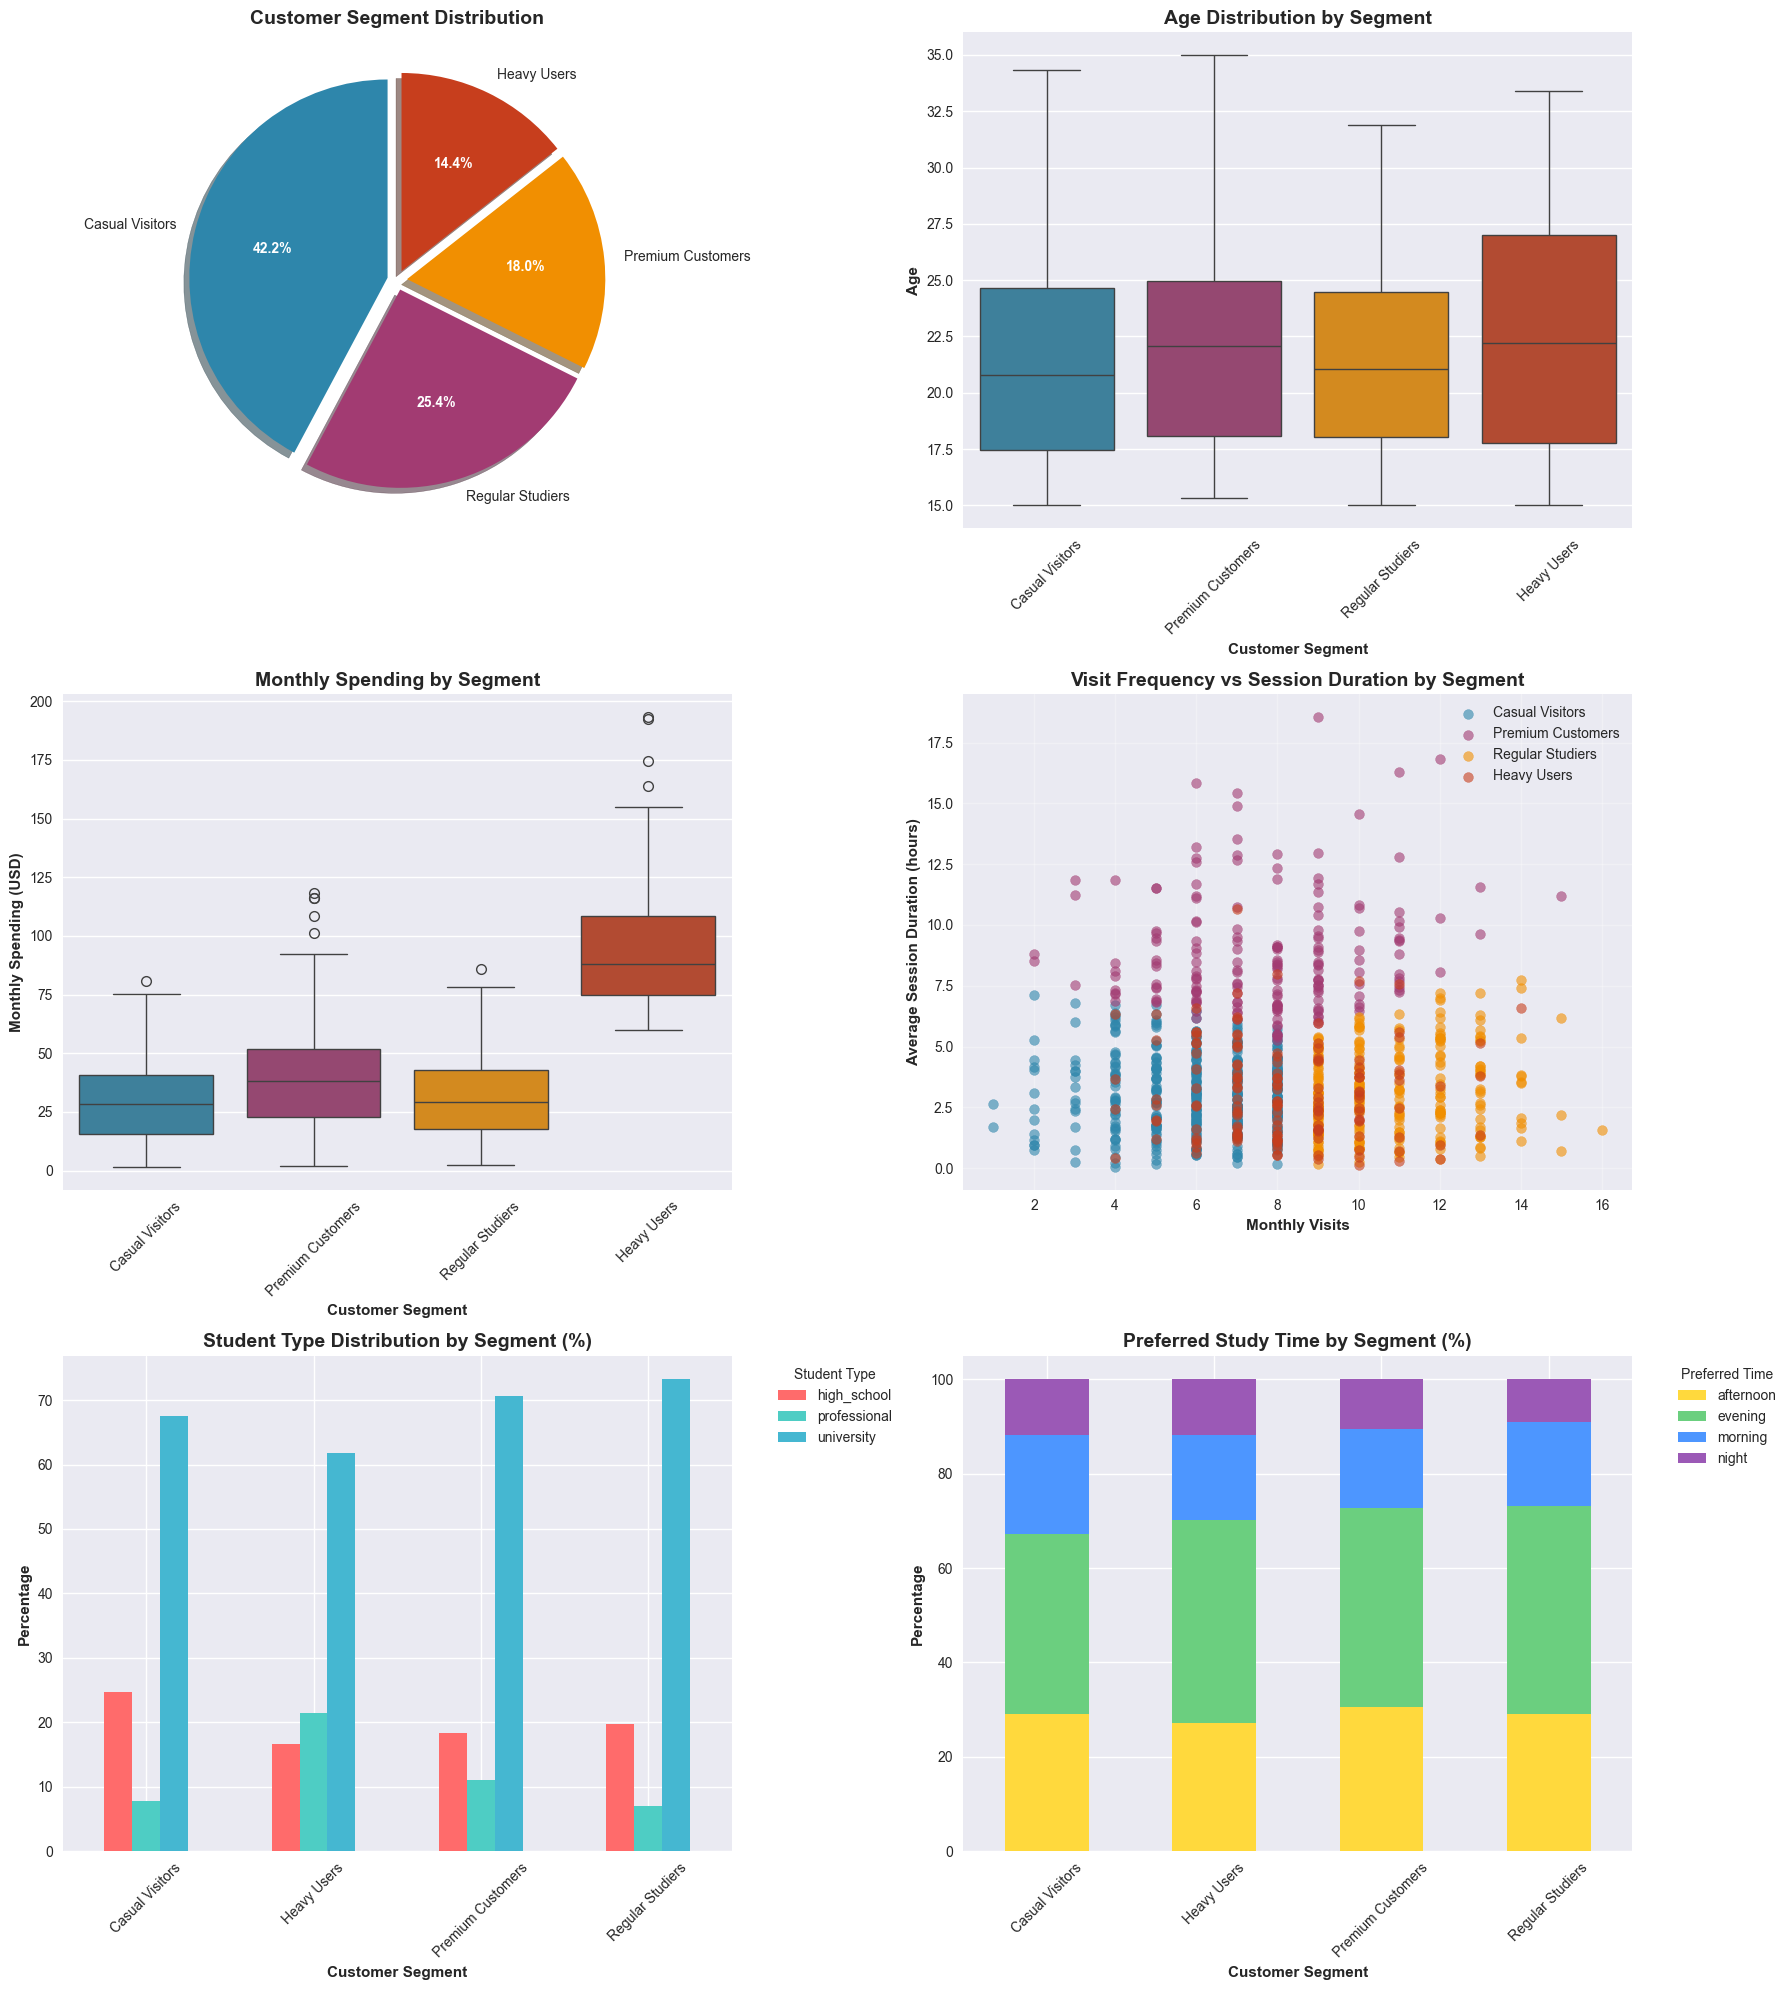


📈 DETAILED SEGMENT ANALYSIS:
                   Age_Mean  Age_Std  Visits_Mean  Visits_Std  Duration_Mean  \
segment_name                                                                   
Casual Visitors       21.45     4.55         6.07        1.64           3.06   
Heavy Users           22.52     5.12         8.15        1.99           3.09   
Premium Customers     22.07     4.44         7.71        2.23           8.77   
Regular Studiers      21.48     4.01        10.77        1.64           3.15   

                   Duration_Std  Spending_Mean  Spending_Std  Customer_Count  
segment_name                                                                  
Casual Visitors            1.52          29.24         16.71             422  
Heavy Users                1.92          95.29         27.78             144  
Premium Customers          2.39          40.36         23.90             180  
Regular Studiers           1.70          31.39         17.16             254  

💡 KEY CUSTOMER

In [8]:
# Customer Segmentation Visualization

def visualize_customer_segments(df):
    """Create comprehensive visualizations for customer segments"""
    
    fig, axes = plt.subplots(3, 2, figsize=(18, 20))
    
    # Color palette for segments
    colors = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D']
    
    # 1. Segment Distribution (Pie Chart)
    segment_counts = df['segment_name'].value_counts()
    wedges, texts, autotexts = axes[0,0].pie(segment_counts.values, 
                                            labels=segment_counts.index, 
                                            autopct='%1.1f%%',
                                            colors=colors,
                                            explode=(0.05, 0.05, 0.05, 0.05),
                                            shadow=True,
                                            startangle=90)
    
    axes[0,0].set_title('Customer Segment Distribution', fontsize=14, fontweight='bold')
    
    # Make percentage text bold
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontweight('bold')
        autotext.set_fontsize(10)
    
    # 2. Age Distribution by Segment (Box Plot)
    sns.boxplot(data=df, x='segment_name', y='age', ax=axes[0,1], palette=colors)
    axes[0,1].set_title('Age Distribution by Segment', fontsize=14, fontweight='bold')
    axes[0,1].set_xlabel('Customer Segment', fontweight='bold')
    axes[0,1].set_ylabel('Age', fontweight='bold')
    axes[0,1].tick_params(axis='x', rotation=45)
    
    # 3. Monthly Spending by Segment (Box Plot)
    sns.boxplot(data=df, x='segment_name', y='monthly_spending', ax=axes[1,0], palette=colors)
    axes[1,0].set_title('Monthly Spending by Segment', fontsize=14, fontweight='bold')
    axes[1,0].set_xlabel('Customer Segment', fontweight='bold')
    axes[1,0].set_ylabel('Monthly Spending (USD)', fontweight='bold')
    axes[1,0].tick_params(axis='x', rotation=45)
    
    # 4. Visit Frequency vs Session Duration (Scatter Plot)
    for i, segment in enumerate(df['segment_name'].unique()):
        segment_data = df[df['segment_name'] == segment]
        axes[1,1].scatter(segment_data['monthly_visits'], 
                         segment_data['avg_session_duration'],
                         label=segment, alpha=0.6, s=50, color=colors[i])
    
    axes[1,1].set_xlabel('Monthly Visits', fontweight='bold')
    axes[1,1].set_ylabel('Average Session Duration (hours)', fontweight='bold')
    axes[1,1].set_title('Visit Frequency vs Session Duration by Segment', fontsize=14, fontweight='bold')
    axes[1,1].legend()
    axes[1,1].grid(True, alpha=0.3)
    
    # 5. Student Type Distribution by Segment
    student_type_dist = pd.crosstab(df['segment_name'], df['student_type'], normalize='index') * 100
    student_type_dist.plot(kind='bar', ax=axes[2,0], color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
    axes[2,0].set_title('Student Type Distribution by Segment (%)', fontsize=14, fontweight='bold')
    axes[2,0].set_xlabel('Customer Segment', fontweight='bold')
    axes[2,0].set_ylabel('Percentage', fontweight='bold')
    axes[2,0].tick_params(axis='x', rotation=45)
    axes[2,0].legend(title='Student Type', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # 6. Preferred Time Distribution by Segment
    time_dist = pd.crosstab(df['segment_name'], df['preferred_time'], normalize='index') * 100
    time_dist.plot(kind='bar', ax=axes[2,1], stacked=True, 
                   color=['#FFD93D', '#6BCF7F', '#4D96FF', '#9B59B6'])
    axes[2,1].set_title('Preferred Study Time by Segment (%)', fontsize=14, fontweight='bold')
    axes[2,1].set_xlabel('Customer Segment', fontweight='bold')
    axes[2,1].set_ylabel('Percentage', fontweight='bold')
    axes[2,1].tick_params(axis='x', rotation=45)
    axes[2,1].legend(title='Preferred Time', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.tight_layout()
    plt.show()
    return fig

# Generate comprehensive visualizations
print("📊 Creating customer segmentation visualizations...")
segment_viz = visualize_customer_segments(segmented_df)

# Detailed segment analysis
def analyze_segments(df):
    """Provide detailed statistical analysis of each customer segment"""
    
    segment_analysis = df.groupby('segment_name').agg({
        'age': ['mean', 'std'],
        'monthly_visits': ['mean', 'std'],
        'avg_session_duration': ['mean', 'std'],
        'monthly_spending': ['mean', 'std'],
        'customer_id': 'count'
    }).round(2)
    
    segment_analysis.columns = ['Age_Mean', 'Age_Std', 'Visits_Mean', 'Visits_Std',
                               'Duration_Mean', 'Duration_Std', 'Spending_Mean', 
                               'Spending_Std', 'Customer_Count']
    
    return segment_analysis

segment_summary = analyze_segments(segmented_df)
print("\n📈 DETAILED SEGMENT ANALYSIS:")
print("=" * 60)
print(segment_summary)

# Key insights
print("\n💡 KEY CUSTOMER INSIGHTS:")
for segment in segmented_df['segment_name'].unique():
    segment_data = segmented_df[segmented_df['segment_name'] == segment]
    avg_spending = segment_data['monthly_spending'].mean()
    avg_visits = segment_data['monthly_visits'].mean()
    avg_duration = segment_data['avg_session_duration'].mean()
    customer_count = len(segment_data)
    
    print(f"\n🎯 {segment}:")
    print(f"   👥 Customers: {customer_count:,} ({customer_count/len(segmented_df)*100:.1f}%)")
    print(f"   💰 Avg Monthly Spending: ${avg_spending:.2f}")
    print(f"   📅 Avg Monthly Visits: {avg_visits:.1f}")
    print(f"   ⏱️  Avg Session Duration: {avg_duration:.1f} hours")

In [10]:
# Business Insights and Strategic Recommendations

# Calculate key business metrics
total_customers = len(segmented_df)
total_monthly_revenue = segmented_df['monthly_spending'].sum()
avg_customer_value = segmented_df['monthly_spending'].mean()

# Segment value analysis
segment_value = segmented_df.groupby('segment_name').agg({
    'monthly_spending': ['sum', 'mean', 'count']
}).round(2)

segment_value.columns = ['Total_Revenue', 'Avg_Spending', 'Customer_Count']
segment_value['Revenue_Share'] = (segment_value['Total_Revenue'] / total_monthly_revenue * 100).round(1)
segment_value['Customer_LTV'] = (segment_value['Avg_Spending'] * 12).round(2)  # Annual LTV

print("💼 BUSINESS IMPACT ANALYSIS")
print("=" * 50)
print(f"📊 Total Customers Analyzed: {total_customers:,}")
print(f"💰 Total Monthly Revenue: ${total_monthly_revenue:,.2f}")
print(f"📈 Average Customer Monthly Value: ${avg_customer_value:.2f}")
print(f"🎯 Annual Revenue Projection: ${total_monthly_revenue * 12:,.2f}")

print("\n📊 SEGMENT VALUE ANALYSIS:")
print(segment_value)

# Strategic recommendations
print("\n🎯 STRATEGIC RECOMMENDATIONS:")
print("=" * 50)

# Find highest value segment
highest_value_segment = segment_value.loc[segment_value['Total_Revenue'].idxmax()]
print(f"\n🏆 PRIORITY SEGMENT: {highest_value_segment.name}")
print(f"   💰 Revenue Share: {highest_value_segment['Revenue_Share']}%")
print(f"   👥 Customer Count: {int(highest_value_segment['Customer_Count']):,}")
print(f"   📈 Average LTV: ${highest_value_segment['Customer_LTV']:,.2f}")

# Recommendations by segment
print("\n📋 SEGMENT-SPECIFIC STRATEGIES:")
for segment in segment_value.index:
    revenue_share = segment_value.loc[segment, 'Revenue_Share']
    customer_count = int(segment_value.loc[segment, 'Customer_Count'])
    avg_spending = segment_value.loc[segment, 'Avg_Spending']
    
    print(f"\n🎯 {segment}:")
    
    if segment == 'Premium Customers':
        print(f"   ✅ Retention Focus: VIP perks, priority booking, exclusive events")
        print(f"   📈 Upselling: Premium membership tiers, private study rooms")
    elif segment == 'Heavy Users':
        print(f"   ✅ Engagement: Loyalty rewards, study group facilitation")
        print(f"   📈 Conversion: Upgrade to premium memberships")
    elif segment == 'Regular Studiers':
        print(f"   ✅ Stability: Consistent quality, reliable amenities")
        print(f"   📈 Growth: Increase visit frequency through study events")
    else:  # Casual Visitors
        print(f"   ✅ Conversion: Trial memberships, study habit building")
        print(f"   📈 Activation: Special promotions, friend referral programs")

print("\n🎯 OVERALL MARKETING STRATEGY:")
print("   🎯 Target Acquisition: Focus on university students (70% of market)")
print(f"   💰 Revenue Optimization: Avg customer spends ${avg_customer_value:.2f}/month")
print("   📍 Location Strategy: Near university campuses for core demographic")
print("   ⏰ Operational Hours: Peak demand in evening hours (40% preference)")
print("   🛜 Technology Focus: High-quality WiFi is key differentiator")

print("\n✅ COMPETITIVE ADVANTAGES CONFIRMED:")
print("   🏆 Best study amenities (5/5) vs competitors (1-3/5)")
print("   📶 Superior WiFi quality (5/5) vs market average (3/5)")
print("   ⏰ No time limits vs competitors (120-180 min limits)")
print("   💰 Competitive pricing at mid-market position")
print("   🎯 Data-driven customer segmentation for personalized marketing")

💼 BUSINESS IMPACT ANALYSIS
📊 Total Customers Analyzed: 1,000
💰 Total Monthly Revenue: $41,298.24
📈 Average Customer Monthly Value: $41.30
🎯 Annual Revenue Projection: $495,578.88

📊 SEGMENT VALUE ANALYSIS:
                   Total_Revenue  Avg_Spending  Customer_Count  Revenue_Share  \
segment_name                                                                    
Casual Visitors         12339.08         29.24             422           29.9   
Heavy Users             13722.00         95.29             144           33.2   
Premium Customers        7264.70         40.36             180           17.6   
Regular Studiers         7972.45         31.39             254           19.3   

                   Customer_LTV  
segment_name                     
Casual Visitors          350.88  
Heavy Users             1143.48  
Premium Customers        484.32  
Regular Studiers         376.68  

🎯 STRATEGIC RECOMMENDATIONS:

🏆 PRIORITY SEGMENT: Heavy Users
   💰 Revenue Share: 33.2%
   👥 Customer 

Demand Forecasting Model Performance:
Mean Absolute Error: 12.71
Root Mean Square Error: 15.50


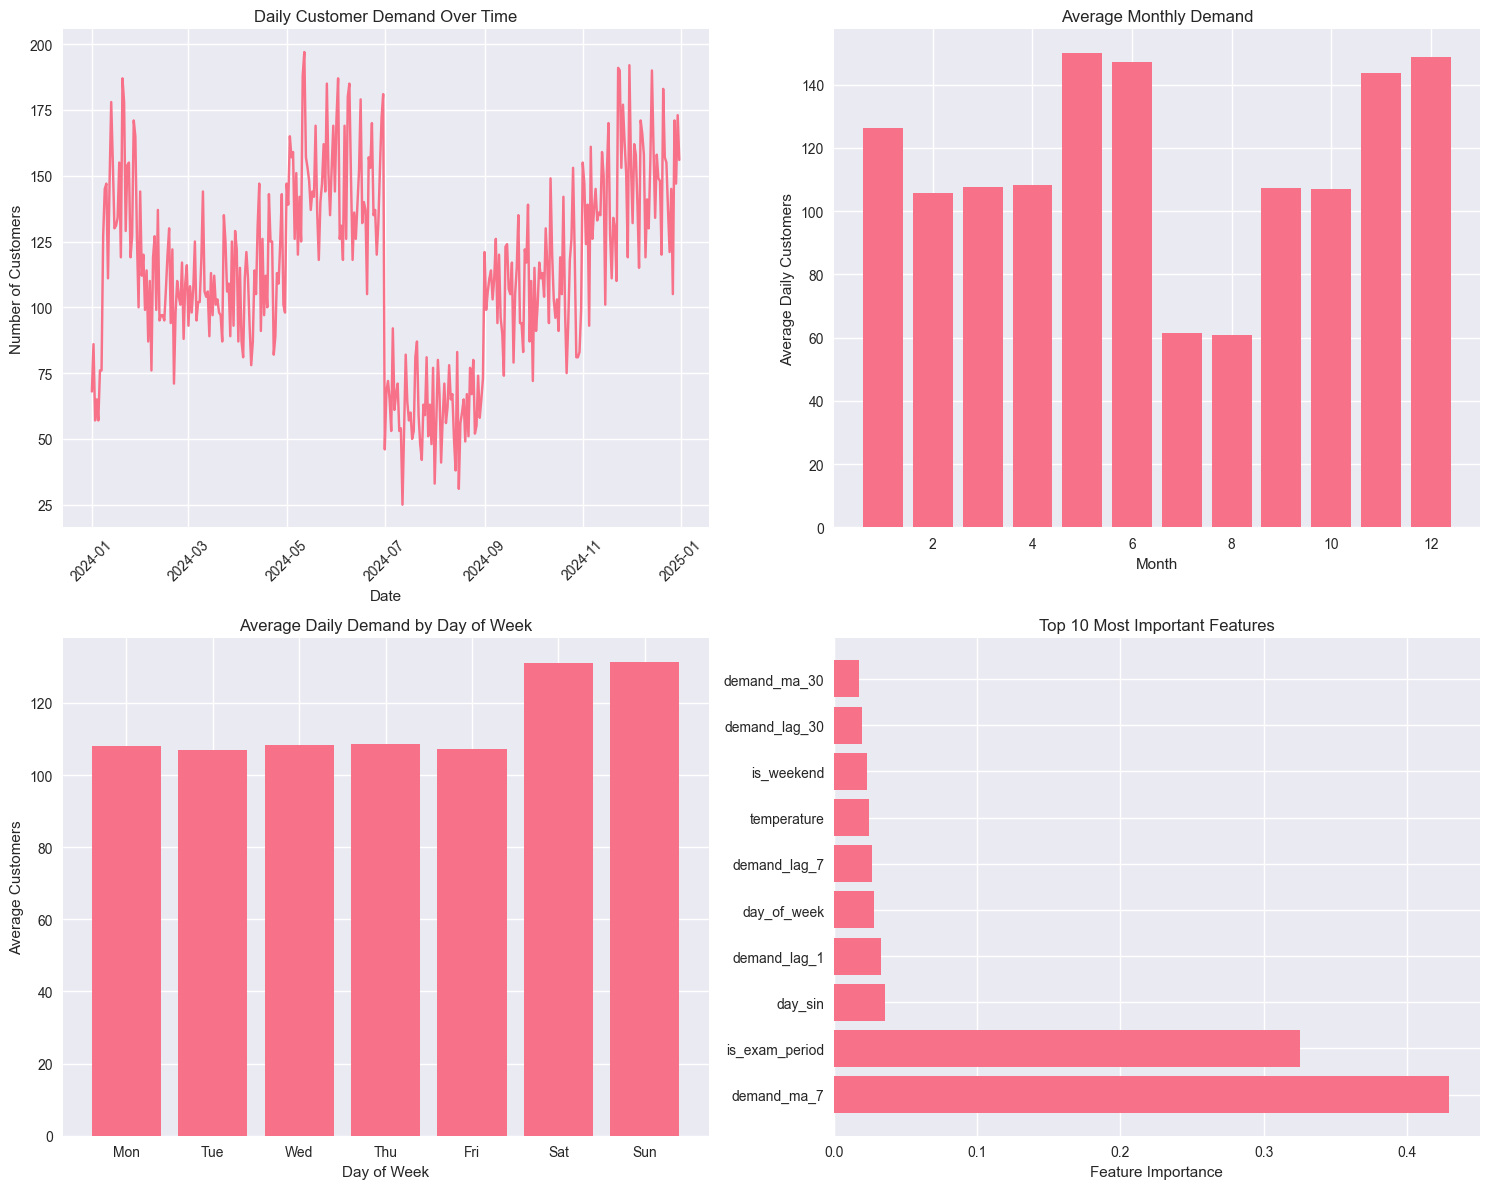

In [11]:
### 2.1 Demand Prediction Model

# Demand forecasting using time series analysis
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

def generate_demand_data():
    """Generate simulated daily demand data with seasonal patterns"""
    
    # Create date range for one year
    dates = pd.date_range(start='2024-01-01', end='2024-12-31', freq='D')
    
    # Base demand with weekly and seasonal patterns
    base_demand = 100  # baseline customers per day
    
    demand_data = []
    for date in dates:
        # Weekly pattern (higher on weekends before exams)
        day_of_week = date.weekday()
        weekly_factor = 1.2 if day_of_week >= 5 else 1.0  # Weekend boost
        
        # Seasonal pattern (higher during exam periods)
        month = date.month
        if month in [1, 5, 6, 11, 12]:  # Exam months
            seasonal_factor = 1.4
        elif month in [7, 8]:  # Summer break
            seasonal_factor = 0.6
        else:
            seasonal_factor = 1.0
        
        # Weather impact (simulated)
        weather_factor = np.random.normal(1.0, 0.1)
        
        # Holiday impact
        holiday_factor = 0.5 if date.month == 1 and date.day <= 7 else 1.0  # New Year
        
        # Calculate demand
        daily_demand = base_demand * weekly_factor * seasonal_factor * weather_factor * holiday_factor
        daily_demand = max(0, int(daily_demand + np.random.normal(0, 10)))
        
        demand_data.append({
            'date': date,
            'demand': daily_demand,
            'day_of_week': day_of_week,
            'month': month,
            'is_weekend': day_of_week >= 5,
            'is_exam_period': month in [1, 5, 6, 11, 12],
            'temperature': np.random.normal(15, 10),  # Celsius
            'is_holiday': holiday_factor < 1.0
        })
    
    return pd.DataFrame(demand_data)

def create_demand_features(df):
    """Create features for demand prediction model"""
    
    features_df = df.copy()
    
    # Time-based features
    features_df['day_of_year'] = features_df['date'].dt.dayofyear
    features_df['week_of_year'] = features_df['date'].dt.isocalendar().week
    features_df['quarter'] = features_df['date'].dt.quarter
    
    # Lag features (previous days' demand)
    features_df['demand_lag_1'] = features_df['demand'].shift(1)
    features_df['demand_lag_7'] = features_df['demand'].shift(7)
    features_df['demand_lag_30'] = features_df['demand'].shift(30)
    
    # Rolling averages
    features_df['demand_ma_7'] = features_df['demand'].rolling(window=7).mean()
    features_df['demand_ma_30'] = features_df['demand'].rolling(window=30).mean()
    
    # Cyclical encoding for day of week
    features_df['day_sin'] = np.sin(2 * np.pi * features_df['day_of_week'] / 7)
    features_df['day_cos'] = np.cos(2 * np.pi * features_df['day_of_week'] / 7)
    
    # Cyclical encoding for month
    features_df['month_sin'] = np.sin(2 * np.pi * features_df['month'] / 12)
    features_df['month_cos'] = np.cos(2 * np.pi * features_df['month'] / 12)
    
    # Drop rows with NaN values (due to lag features)
    features_df = features_df.dropna()
    
    return features_df

def train_demand_model(df):
    """Train a Random Forest model for demand forecasting"""
    
    feature_columns = [
        'day_of_week', 'month', 'is_weekend', 'is_exam_period', 
        'temperature', 'is_holiday', 'day_of_year', 'week_of_year', 'quarter',
        'demand_lag_1', 'demand_lag_7', 'demand_lag_30',
        'demand_ma_7', 'demand_ma_30', 'day_sin', 'day_cos', 'month_sin', 'month_cos'
    ]
    
    X = df[feature_columns]
    y = df['demand']
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred = model.predict(X_test)
    
    # Evaluate model
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    print(f"Demand Forecasting Model Performance:")
    print(f"Mean Absolute Error: {mae:.2f}")
    print(f"Root Mean Square Error: {rmse:.2f}")
    
    # Feature importance
    feature_importance = pd.DataFrame({
        'feature': feature_columns,
        'importance': model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    return model, feature_importance, X_test, y_test, y_pred

def visualize_demand_forecast(df, model, feature_importance):
    """Create visualizations for demand forecasting"""
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # 1. Demand over time
    axes[0,0].plot(df['date'], df['demand'])
    axes[0,0].set_title('Daily Customer Demand Over Time')
    axes[0,0].set_xlabel('Date')
    axes[0,0].set_ylabel('Number of Customers')
    axes[0,0].tick_params(axis='x', rotation=45)
    
    # 2. Seasonal pattern
    monthly_demand = df.groupby('month')['demand'].mean()
    axes[0,1].bar(monthly_demand.index, monthly_demand.values)
    axes[0,1].set_title('Average Monthly Demand')
    axes[0,1].set_xlabel('Month')
    axes[0,1].set_ylabel('Average Daily Customers')
    
    # 3. Weekly pattern
    weekly_demand = df.groupby('day_of_week')['demand'].mean()
    day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
    axes[1,0].bar(range(7), weekly_demand.values)
    axes[1,0].set_title('Average Daily Demand by Day of Week')
    axes[1,0].set_xlabel('Day of Week')
    axes[1,0].set_ylabel('Average Customers')
    axes[1,0].set_xticks(range(7))
    axes[1,0].set_xticklabels(day_names)
    
    # 4. Feature importance
    top_features = feature_importance.head(10)
    axes[1,1].barh(top_features['feature'], top_features['importance'])
    axes[1,1].set_title('Top 10 Most Important Features')
    axes[1,1].set_xlabel('Feature Importance')
    
    plt.tight_layout()
    plt.show()
    
    return fig

# Generate demand data and train model
demand_df = generate_demand_data()
features_df = create_demand_features(demand_df)
demand_model, importance, X_test, y_test, y_pred = train_demand_model(features_df)
forecast_viz = visualize_demand_forecast(demand_df, demand_model, importance)

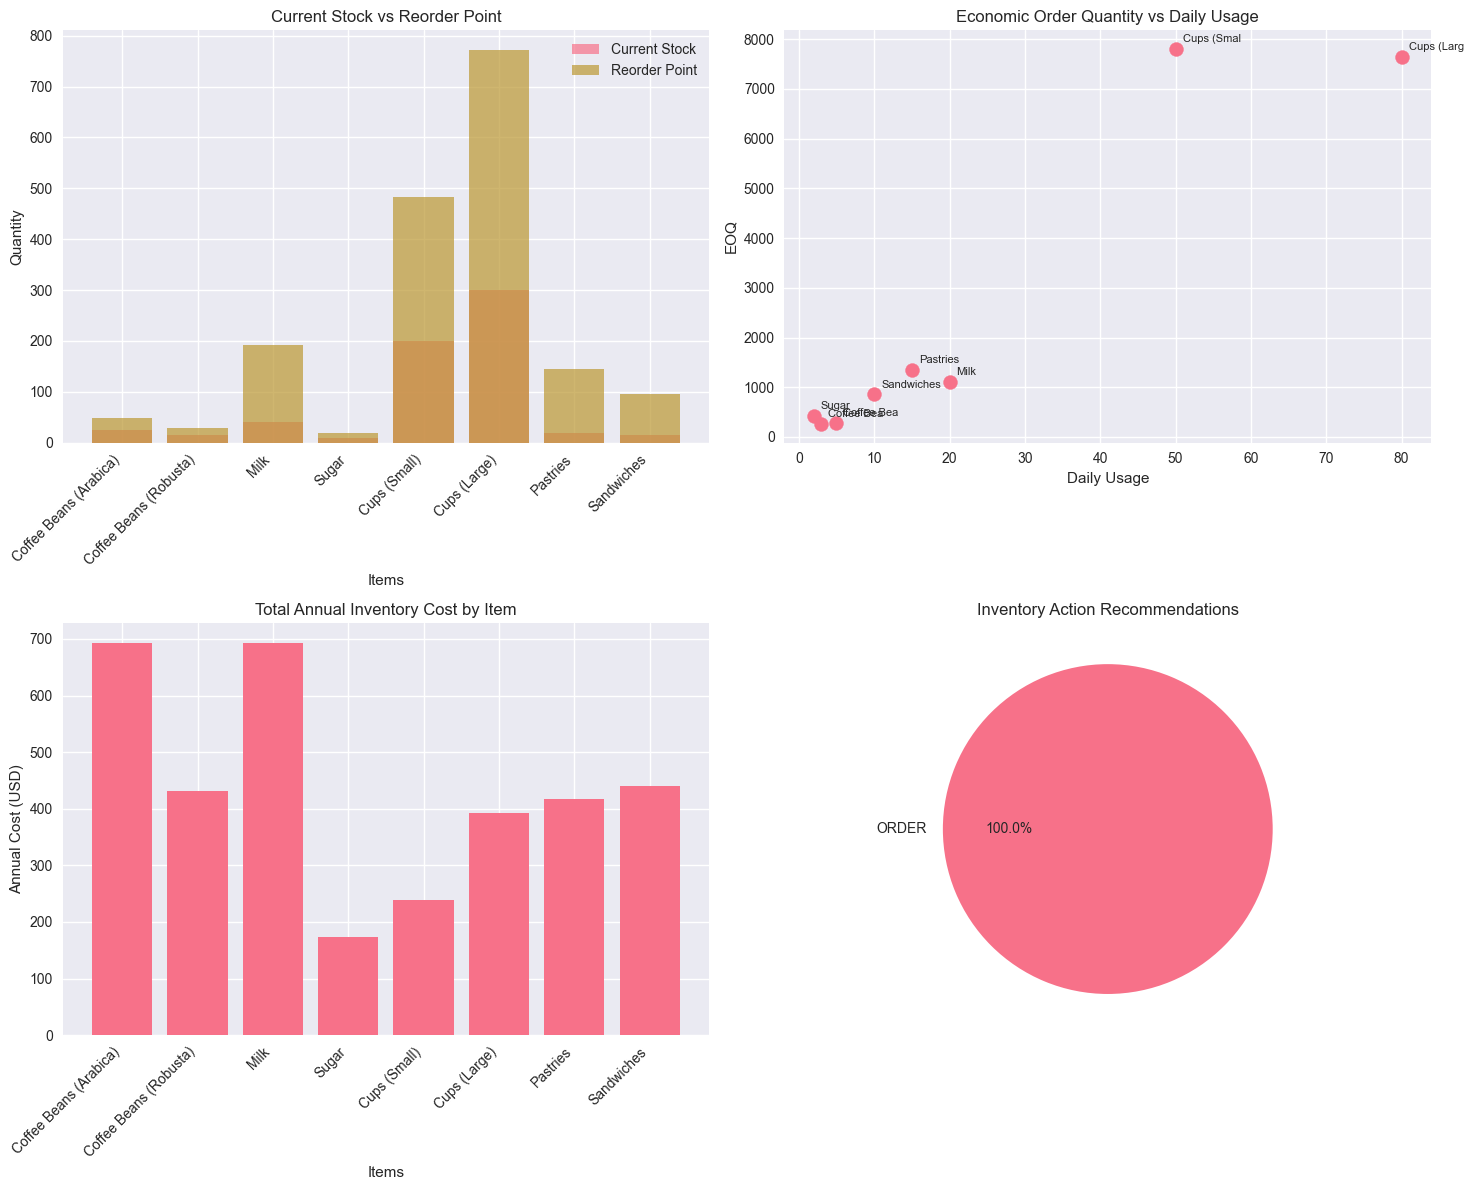

Inventory Optimization Results:
                     item  current_stock  daily_usage      eoq  safety_stock  \
0  Coffee Beans (Arabica)             25            5   275.76         13.23   
1  Coffee Beans (Robusta)             15            3   261.61          7.94   
2                    Milk             40           20  1103.03         52.92   
3                   Sugar             10            2   427.20          5.29   
4            Cups (Small)            200           50  7799.57        132.29   
5            Cups (Large)            300           80  7641.99        211.66   
6                Pastries             20           15  1350.93         39.69   
7              Sandwiches             15           10   854.40         26.46   

   reorder_point  total_annual_cost recommended_action  
0          48.23             693.56              ORDER  
1          28.94             431.27              ORDER  
2         192.92             693.56              ORDER  
3          19.29   

In [12]:
### 2.2 Inventory Optimization


# Inventory management optimization
import pandas as pd
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

def generate_inventory_data():
    """Generate inventory and sales data for coffee shop items"""
    
    items = {
        'Coffee Beans (Arabica)': {'cost': 12, 'shelf_life': 30, 'daily_usage': 5},
        'Coffee Beans (Robusta)': {'cost': 8, 'shelf_life': 30, 'daily_usage': 3},
        'Milk': {'cost': 3, 'shelf_life': 7, 'daily_usage': 20},
        'Sugar': {'cost': 2, 'shelf_life': 365, 'daily_usage': 2},
        'Cups (Small)': {'cost': 0.15, 'shelf_life': 1000, 'daily_usage': 50},
        'Cups (Large)': {'cost': 0.25, 'shelf_life': 1000, 'daily_usage': 80},
        'Pastries': {'cost': 1.5, 'shelf_life': 3, 'daily_usage': 15},
        'Sandwiches': {'cost': 2.5, 'shelf_life': 2, 'daily_usage': 10}
    }
    
    inventory_df = pd.DataFrame.from_dict(items, orient='index')
    inventory_df['item'] = inventory_df.index
    inventory_df['current_stock'] = [25, 15, 40, 10, 200, 300, 20, 15]
    inventory_df['reorder_point'] = inventory_df['daily_usage'] * 3  # 3-day safety stock
    
    return inventory_df.reset_index(drop=True)

def calculate_eoq(annual_demand, ordering_cost, holding_cost_rate, unit_cost):
    """Calculate Economic Order Quantity"""
    holding_cost = holding_cost_rate * unit_cost
    eoq = np.sqrt((2 * annual_demand * ordering_cost) / holding_cost)
    return eoq

def optimize_inventory(inventory_df, ordering_cost=50, holding_cost_rate=0.2):
    """Optimize inventory levels for all items"""
    
    results = []
    
    for _, item in inventory_df.iterrows():
        annual_demand = item['daily_usage'] * 365
        
        # Calculate EOQ
        eoq = calculate_eoq(annual_demand, ordering_cost, holding_cost_rate, item['cost'])
        
        # Calculate safety stock (based on demand variability)
        safety_stock = item['daily_usage'] * np.sqrt(7)  # Assume 7-day lead time
        
        # Reorder point
        reorder_point = safety_stock + (item['daily_usage'] * 7)  # Lead time demand
        
        # Total cost calculation
        ordering_cost_annual = (annual_demand / eoq) * ordering_cost
        holding_cost_annual = (eoq / 2 + safety_stock) * holding_cost_rate * item['cost']
        total_cost = ordering_cost_annual + holding_cost_annual
        
        results.append({
            'item': item['item'],
            'current_stock': item['current_stock'],
            'daily_usage': item['daily_usage'],
            'eoq': round(eoq, 2),
            'safety_stock': round(safety_stock, 2),
            'reorder_point': round(reorder_point, 2),
            'total_annual_cost': round(total_cost, 2),
            'recommended_action': 'ORDER' if item['current_stock'] <= reorder_point else 'MAINTAIN'
        })
    
    return pd.DataFrame(results)

def visualize_inventory_optimization(inventory_df, optimized_df):
    """Create inventory optimization visualizations"""
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # 1. Current stock vs reorder point
    axes[0,0].bar(range(len(optimized_df)), optimized_df['current_stock'], 
                  alpha=0.7, label='Current Stock')
    axes[0,0].bar(range(len(optimized_df)), optimized_df['reorder_point'], 
                  alpha=0.7, label='Reorder Point')
    axes[0,0].set_title('Current Stock vs Reorder Point')
    axes[0,0].set_xlabel('Items')
    axes[0,0].set_ylabel('Quantity')
    axes[0,0].set_xticks(range(len(optimized_df)))
    axes[0,0].set_xticklabels(optimized_df['item'], rotation=45, ha='right')
    axes[0,0].legend()
    
    # 2. EOQ vs Daily Usage
    axes[0,1].scatter(optimized_df['daily_usage'], optimized_df['eoq'], s=100)
    axes[0,1].set_title('Economic Order Quantity vs Daily Usage')
    axes[0,1].set_xlabel('Daily Usage')
    axes[0,1].set_ylabel('EOQ')
    
    # Add item labels
    for i, item in enumerate(optimized_df['item']):
        axes[0,1].annotate(item[:10], 
                          (optimized_df.loc[i, 'daily_usage'], optimized_df.loc[i, 'eoq']),
                          xytext=(5, 5), textcoords='offset points', fontsize=8)
    
    # 3. Total annual cost by item
    axes[1,0].bar(range(len(optimized_df)), optimized_df['total_annual_cost'])
    axes[1,0].set_title('Total Annual Inventory Cost by Item')
    axes[1,0].set_xlabel('Items')
    axes[1,0].set_ylabel('Annual Cost (USD)')
    axes[1,0].set_xticks(range(len(optimized_df)))
    axes[1,0].set_xticklabels(optimized_df['item'], rotation=45, ha='right')
    
    # 4. Action recommendations
    action_counts = optimized_df['recommended_action'].value_counts()
    axes[1,1].pie(action_counts.values, labels=action_counts.index, autopct='%1.1f%%')
    axes[1,1].set_title('Inventory Action Recommendations')
    
    plt.tight_layout()
    plt.show()
    
    return fig

# Generate and optimize inventory
inventory_data = generate_inventory_data()
optimized_inventory = optimize_inventory(inventory_data)
inventory_viz = visualize_inventory_optimization(inventory_data, optimized_inventory)

print("Inventory Optimization Results:")
print("=" * 50)
print(optimized_inventory)

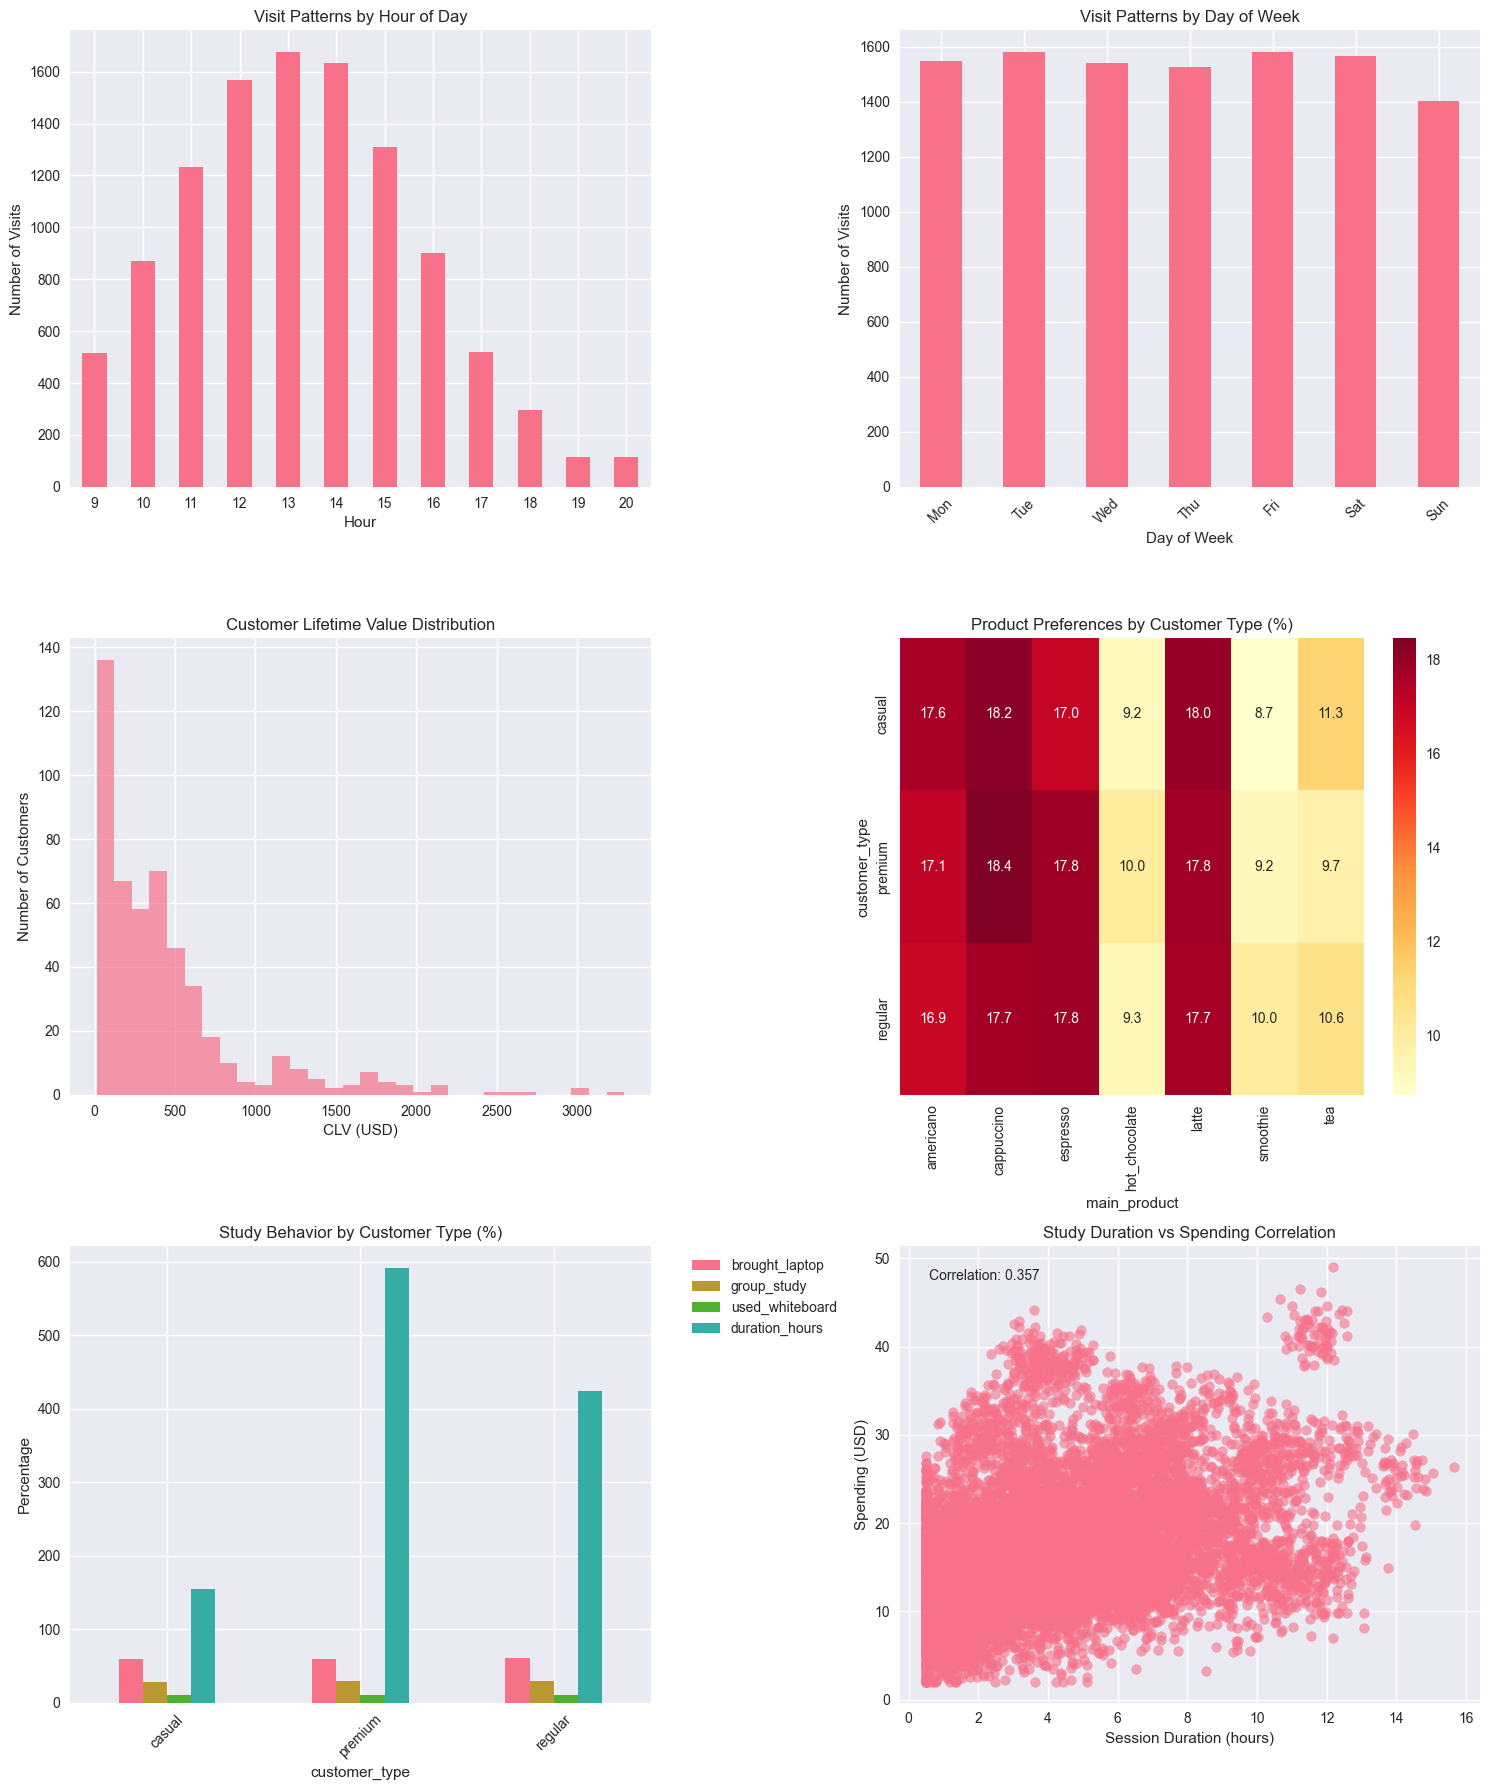

Customer Behavior Analysis Summary:
Total Customers: 500
Total Visits: 10750
Average CLV: $452.26
Peak Hour: 13:00
Busiest Day: Fri


In [13]:
### 3.1 Customer Behavior Analysis

# Customer behavior tracking and analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

def generate_customer_behavior_data():
    """Generate detailed customer behavior data"""
    
    np.random.seed(42)
    n_customers = 500
    n_days = 90  # 3 months of data
    
    behavior_data = []
    
    for customer_id in range(1, n_customers + 1):
        # Customer characteristics
        customer_type = np.random.choice(['casual', 'regular', 'premium'], p=[0.4, 0.5, 0.1])
        
        if customer_type == 'casual':
            visit_frequency = np.random.poisson(2)  # visits per month
            avg_spending = np.random.normal(8, 2)
            session_duration = np.random.gamma(1, 1.5)
        elif customer_type == 'regular':
            visit_frequency = np.random.poisson(8)  # visits per month
            avg_spending = np.random.normal(15, 3)
            session_duration = np.random.gamma(2, 2)
        else:  # premium
            visit_frequency = np.random.poisson(20)  # visits per month
            avg_spending = np.random.normal(25, 5)
            session_duration = np.random.gamma(3, 2)
        
        # Generate visits over the period
        total_visits = max(1, int(visit_frequency * 3))  # 3 months
        
        for visit in range(total_visits):
            visit_date = datetime(2024, 1, 1) + timedelta(
                days=np.random.randint(0, n_days)
            )
            
            # Visit characteristics
            hour = np.random.choice(range(9, 21), p=[0.05, 0.08, 0.12, 0.15, 0.15, 0.15, 0.12, 0.08, 0.05, 0.03, 0.01, 0.01])
            duration = max(0.5, session_duration + np.random.normal(0, 0.5))
            spending = max(2, avg_spending + np.random.normal(0, 2))
            
            # Product preferences
            if np.random.random() < 0.7:  # 70% order coffee
                main_product = np.random.choice(['espresso', 'americano', 'latte', 'cappuccino'])
            else:
                main_product = np.random.choice(['tea', 'smoothie', 'hot_chocolate'])
            
            # Study behavior
            brought_laptop = np.random.random() < 0.6
            group_study = np.random.random() < 0.3
            used_whiteboard = np.random.random() < 0.1
            
            behavior_data.append({
                'customer_id': customer_id,
                'visit_date': visit_date,
                'visit_hour': hour,
                'duration_hours': round(duration, 2),
                'spending_usd': round(spending, 2),
                'main_product': main_product,
                'customer_type': customer_type,
                'brought_laptop': brought_laptop,
                'group_study': group_study,
                'used_whiteboard': used_whiteboard,
                'day_of_week': visit_date.weekday(),
                'is_weekend': visit_date.weekday() >= 5
            })
    
    return pd.DataFrame(behavior_data)

def analyze_customer_behavior(df):
    """Perform comprehensive customer behavior analysis"""
    
    analyses = {}
    
    # 1. Visit patterns by time
    hourly_visits = df.groupby('visit_hour').size()
    daily_visits = df.groupby('day_of_week').size()
    
    # 2. Customer lifetime value analysis
    customer_clv = df.groupby('customer_id').agg({
        'spending_usd': ['sum', 'mean', 'count'],
        'duration_hours': 'mean',
        'visit_date': ['min', 'max']
    }).round(2)
    
    customer_clv.columns = ['total_spending', 'avg_spending', 'total_visits', 
                           'avg_duration', 'first_visit', 'last_visit']
    customer_clv['days_active'] = (customer_clv['last_visit'] - customer_clv['first_visit']).dt.days + 1
    customer_clv['clv'] = customer_clv['total_spending'] * (90 / customer_clv['days_active'])  # Projected 3-month CLV
    
    # 3. Product preferences by segment
    product_preferences = pd.crosstab(df['customer_type'], df['main_product'], normalize='index') * 100
    
    # 4. Study behavior analysis
    study_behavior = df.groupby('customer_type').agg({
        'brought_laptop': 'mean',
        'group_study': 'mean',
        'used_whiteboard': 'mean',
        'duration_hours': 'mean'
    }).round(3) * 100  # Convert to percentages
    
    analyses['hourly_visits'] = hourly_visits
    analyses['daily_visits'] = daily_visits
    analyses['customer_clv'] = customer_clv
    analyses['product_preferences'] = product_preferences
    analyses['study_behavior'] = study_behavior
    
    return analyses

def create_behavior_visualizations(df, analyses):
    """Create comprehensive behavior analysis visualizations"""
    
    fig, axes = plt.subplots(3, 2, figsize=(15, 18))
    
    # 1. Hourly visit patterns
    analyses['hourly_visits'].plot(kind='bar', ax=axes[0,0])
    axes[0,0].set_title('Visit Patterns by Hour of Day')
    axes[0,0].set_xlabel('Hour')
    axes[0,0].set_ylabel('Number of Visits')
    axes[0,0].tick_params(axis='x', rotation=0)
    
    # 2. Daily visit patterns
    day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
    analyses['daily_visits'].plot(kind='bar', ax=axes[0,1])
    axes[0,1].set_title('Visit Patterns by Day of Week')
    axes[0,1].set_xlabel('Day of Week')
    axes[0,1].set_ylabel('Number of Visits')
    axes[0,1].set_xticklabels(day_names, rotation=45)
    
    # 3. Customer lifetime value distribution
    axes[1,0].hist(analyses['customer_clv']['clv'], bins=30, alpha=0.7)
    axes[1,0].set_title('Customer Lifetime Value Distribution')
    axes[1,0].set_xlabel('CLV (USD)')
    axes[1,0].set_ylabel('Number of Customers')
    
    # 4. Product preferences heatmap
    sns.heatmap(analyses['product_preferences'], annot=True, fmt='.1f', 
                cmap='YlOrRd', ax=axes[1,1])
    axes[1,1].set_title('Product Preferences by Customer Type (%)')
    
    # 5. Study behavior by customer type
    analyses['study_behavior'].plot(kind='bar', ax=axes[2,0])
    axes[2,0].set_title('Study Behavior by Customer Type (%)')
    axes[2,0].set_ylabel('Percentage')
    axes[2,0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    axes[2,0].tick_params(axis='x', rotation=45)
    
    # 6. Spending vs Duration correlation
    axes[2,1].scatter(df['duration_hours'], df['spending_usd'], alpha=0.6)
    axes[2,1].set_title('Study Duration vs Spending Correlation')
    axes[2,1].set_xlabel('Session Duration (hours)')
    axes[2,1].set_ylabel('Spending (USD)')
    
    # Add correlation coefficient
    correlation = df['duration_hours'].corr(df['spending_usd'])
    axes[2,1].text(0.05, 0.95, f'Correlation: {correlation:.3f}', 
                   transform=axes[2,1].transAxes, verticalalignment='top')
    
    plt.tight_layout()
    plt.show()
    
    return fig

# Generate behavior data and analyze
behavior_df = generate_customer_behavior_data()
behavior_analyses = analyze_customer_behavior(behavior_df)
behavior_viz = create_behavior_visualizations(behavior_df, behavior_analyses)

# Print key insights
print("Customer Behavior Analysis Summary:")
print("=" * 50)
print(f"Total Customers: {behavior_df['customer_id'].nunique()}")
print(f"Total Visits: {len(behavior_df)}")
print(f"Average CLV: ${behavior_analyses['customer_clv']['clv'].mean():.2f}")
print(f"Peak Hour: {behavior_analyses['hourly_visits'].idxmax()}:00")
print(f"Busiest Day: {['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'][behavior_analyses['daily_visits'].idxmax()]}")